In [1]:
# Steven Locorotondo
# group project

# notes: value at risk for further analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [3]:
!ls

DSA_project.pdf               Steven_stock_clustering.ipynb
SP_500_close_2015.csv         veryUseful.py
SP_500_firms.csv


In [4]:
stocks = pd.read_csv('SP_500_close_2015.csv')

In [5]:
stocks.head()

,Date,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,2015-01-02,156.678596,43.160459,61.986410,86.129228,19.765196,139.234407,72.339996,158.132353,12.860543,...,33.927597,13.191375,41.513829,32.998169,37.072501,50.169998,69.542301,110.963875,27.853656,42.723658
1,2015-01-05,153.145069,43.170070,60.819874,84.674997,19.490271,135.889914,71.980003,156.047994,12.494440,...,33.542483,12.903563,40.752108,33.199318,34.765202,49.130001,68.129346,115.103219,26.810004,42.467175
2,2015-01-06,151.511999,42.679830,60.518833,84.064223,19.126976,134.187800,70.529999,155.938290,12.212822,...,33.720953,12.730876,40.161775,33.362155,34.560759,49.209999,67.293113,114.127520,25.786046,42.052863
3,2015-01-07,152.610267,43.025880,62.964797,85.828689,18.714587,136.566769,71.110001,159.289228,12.231597,...,34.012134,12.893969,40.180818,33.381309,34.833350,48.590000,69.523080,116.965922,26.032190,42.920947
4,2015-01-08,156.267949,43.910238,63.623323,87.137495,18.901144,141.344618,72.919998,160.685446,12.419342,...,34.406643,13.248937,41.075840,33.927287,35.096207,50.230000,70.734178,118.207726,26.396482,43.581878


In [6]:
# make dframe with returns
stock_returns = stocks["Date"]
stock_returns = pd.DataFrame(stock_returns)
for i in range(1,len(stocks.columns)):
    stock_returns[stocks.columns[i]] = stocks[stocks.columns[i]].pct_change()

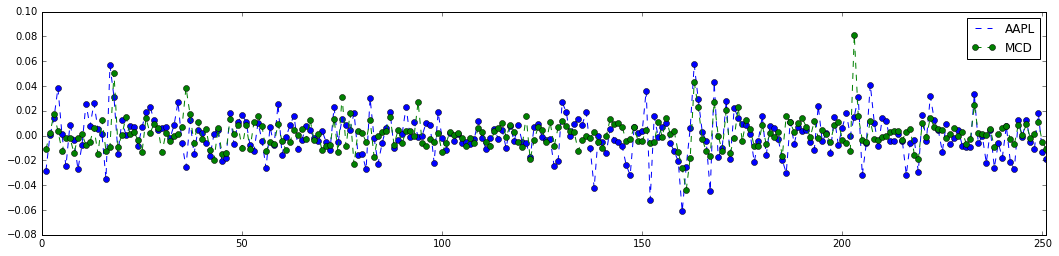

In [7]:
# function to plot returns over a year
def plot_daily_returns(stock_ticker):
    return stock_returns[stock_ticker].plot(figsize=(18,4),legend=True, linestyle='--', marker='o');
    
plot_daily_returns('AAPL')
plot_daily_returns('MCD')

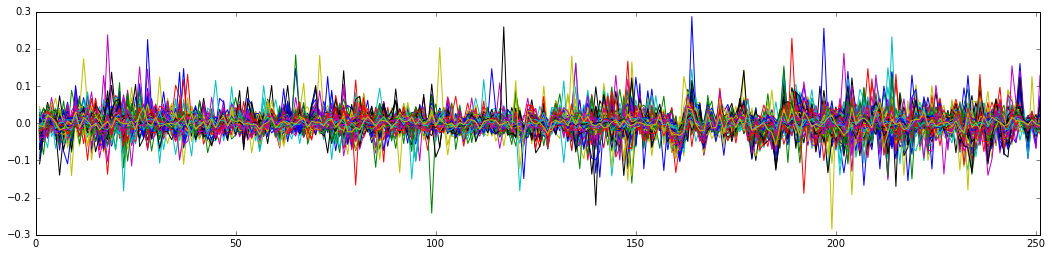

In [31]:
# plot returns for all the stocks

stock_returns.plot(legend = False, figsize=(18,4))

In [8]:
# function that returns company name using stock ticker
def get_name(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

print(get_name("AAPL"))

Apple Inc.


In [9]:
# function to calculate correlations between to stocks

def get_corr(stock_ticker1, stock_ticker2):
    temp = stock_returns[[stock_ticker1, stock_ticker2]]
    corr = temp.corr(method = 'pearson')
    company_name1 = get_name(stock_ticker1)
    company_name2 = get_name(stock_ticker2)
    value = corr[stock_ticker1][1]
    print ("The correlation between %s and %s is %.2f" % (company_name1, company_name2, value))

get_corr("AAPL", "GE")

The correlation between Apple Inc. and General Electric Company is 0.40


In [11]:
# function that calculates correlations between all columns

def get_corr(stock_data):
    """stock_data is a dataframe with dates as a first column and stock ticker for all subsequent columns
    the columns contain daily returns for respective stocks
    """
    # get all column names minus the first one
    col_names = stock_data.columns.values[1:]

    # make empty dframe with colnames as rownames
    all_corr = pd.DataFrame(columns = col_names, index = col_names)

    # make dframe with correlation between all companies
    for i in range(1,len(stock_data.columns)):
        for j in range(1,len(stock_data.columns)):
            temp = stocks[[stock_data.columns[i], stock_data.columns[j]]]
            corr = temp.corr(method = 'pearson')
            value = corr.ix[0, 1]
            all_corr.ix[i-1, j-1] = value
    return all_corr

corr_table = get_corr(stocks)
#### takes couple minutes to run! (+-5 mins)
corr_table

,MMM,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AES,AET,...,XEL,XRX,XLNX,XL,XYL,YHOO,YUM,ZBH,ZION,ZTS
MMM,1,0.2641,-0.0486122,-0.339348,-0.382178,-0.378558,-0.25483,-0.541397,0.320658,-0.478656,...,0.0507196,0.683549,0.000794803,-0.308476,0.620315,0.749605,-0.0815362,0.781872,-0.239086,0.193206
ABT,0.2641,1,0.794478,0.0633279,-0.257818,0.0609895,-0.0251609,-0.243363,0.617116,0.408628,...,-0.470723,0.0707519,0.0444439,0.371297,0.327286,0.324388,0.710363,0.39673,0.595002,0.834076
ABBV,-0.0486122,0.794478,1,0.0243531,-0.297206,-0.00707624,-0.125505,-0.0410658,0.633536,0.437528,...,-0.462226,-0.0712476,-0.0183374,0.230276,0.118476,0.231759,0.694264,0.239883,0.610541,0.654291
ACN,-0.339348,0.0633279,0.0243531,1,0.886703,0.926489,0.907655,0.512276,-0.54547,0.461759,...,0.261396,-0.795327,0.792622,0.813484,0.321481,-0.72698,-0.0538307,-0.719242,0.58789,0.192257
ATVI,-0.382178,-0.257818,-0.297206,0.886703,1,0.920191,0.942121,0.445306,-0.82653,0.27745,...,0.40666,-0.753772,0.75965,0.66881,0.23331,-0.822403,-0.314563,-0.775822,0.302798,-0.0152665
AYI,-0.378558,0.0609895,-0.00707624,0.926489,0.920191,1,0.918709,0.386038,-0.627026,0.431796,...,0.255892,-0.767734,0.74311,0.831434,0.264576,-0.759732,-0.100028,-0.702388,0.493847,0.241156
ADBE,-0.25483,-0.0251609,-0.125505,0.907655,0.942121,0.918709,1,0.403279,-0.699686,0.351405,...,0.350194,-0.698546,0.792949,0.739065,0.387741,-0.721459,-0.184909,-0.645919,0.444301,0.190802
AAP,-0.541397,-0.243363,-0.0410658,0.512276,0.445306,0.386038,0.403279,1,-0.337874,0.34076,...,0.296428,-0.606238,0.19592,0.28019,-0.316916,-0.654522,-0.18178,-0.651446,0.302083,-0.293949
AES,0.320658,0.617116,0.633536,-0.54547,-0.82653,-0.627026,-0.699686,-0.337874,1,0.148007,...,-0.566463,0.462742,-0.411936,-0.240394,-0.000688762,0.7184,0.67621,0.667519,0.150647,0.375729
AET,-0.478656,0.408628,0.437528,0.461759,0.27745,0.431796,0.351405,0.34076,0.148007,1,...,-0.48905,-0.636594,0.34636,0.647916,-0.0378029,-0.450042,0.648205,-0.367589,0.763541,0.529727


In [ ]:
# function to get highest and lowest correlation for each (or selected) stock



In [ ]:
# test graph problem on small portion of correlation table
test = corr_table.ix[0:4,0:4]
test

In [15]:
list = []
edge = ()

for i in range(len(corr_table)):
    edge = edge + (corr_table.ix[0,i],)
    list.append(edge)
    edge = ()
    
for i in range(len(list)):
    list[i] = list[i] + (corr_table.index[0],)
    
for i in range(len(list)):
    list[i] = list[i] + (corr_table.index[i],)

In [16]:
list

[(1.0, 'MMM', 'MMM'),
 (0.26409984123662011, 'MMM', 'ABT'),
 (-0.048612222364507116, 'MMM', 'ABBV'),
 (-0.33934774933095124, 'MMM', 'ACN'),
 (-0.382177525909353, 'MMM', 'ATVI'),
 (-0.37855773172879897, 'MMM', 'AYI'),
 (-0.25482957676274515, 'MMM', 'ADBE'),
 (-0.54139654151808148, 'MMM', 'AAP'),
 (0.32065812579414482, 'MMM', 'AES'),
 (-0.47865637611293427, 'MMM', 'AET'),
 (0.53299466068102219, 'MMM', 'AMG'),
 (0.43045704824794001, 'MMM', 'AFL'),
 (0.72653432377622174, 'MMM', 'A'),
 (0.69371748377833287, 'MMM', 'APD'),
 (-0.10443798843282592, 'MMM', 'AKAM'),
 (-0.6126434527124639, 'MMM', 'ALK'),
 (0.61674803753753915, 'MMM', 'ALB'),
 (0.66304627902378321, 'MMM', 'AA'),
 (0.21738439854118821, 'MMM', 'ALXN'),
 (-0.13349801794048288, 'MMM', 'ALLE'),
 (-0.048882275177080006, 'MMM', 'AGN'),
 (0.72921909168714638, 'MMM', 'ADS'),
 (0.53253782706791497, 'MMM', 'LNT'),
 (0.83225247053404028, 'MMM', 'ALL'),
 (-0.39709850370460431, 'MMM', 'GOOGL'),
 (-0.32427609446263345, 'MMM', 'GOOG'),
 (-0.22590

In [109]:
# algorithm to extract all correlations and respective stocks

list = []
list_count = 0   # count for the number of tuples in list
col_count = 0   # count for columns, every new column start at a lower row (skip one row every iteration)
edge = ()   # intialize empty tuple (set)

for i in range(len(corr_table)):
    for j in range(1, len(corr_table) - i):
        # reduce length of column at every iteration, otherwise repetitions go beyond length of column
        
        edge = edge + (corr_table.ix[j + col_count, i], )   # copy weight of edge from table (correlation)
        list.append(edge)
        
        list[list_count] = list[list_count] + (corr_table.columns[i], )   # append column index (stock)
        list[list_count] = list[list_count] + (corr_table.index[j + col_count], )   # append row index (stock)
        
        edge = ()   # re-initialize edge for next iteration
        list_count += 1   # counter for position in list
    col_count += 1   # used to start next iteration at a lower row

In [110]:
list

[(0.26409984123662011, 'MMM', 'ABT'),
 (-0.048612222364507116, 'MMM', 'ABBV'),
 (-0.33934774933095124, 'MMM', 'ACN'),
 (-0.382177525909353, 'MMM', 'ATVI'),
 (-0.37855773172879897, 'MMM', 'AYI'),
 (-0.25482957676274515, 'MMM', 'ADBE'),
 (-0.54139654151808148, 'MMM', 'AAP'),
 (0.32065812579414482, 'MMM', 'AES'),
 (-0.47865637611293427, 'MMM', 'AET'),
 (0.53299466068102219, 'MMM', 'AMG'),
 (0.43045704824794001, 'MMM', 'AFL'),
 (0.72653432377622174, 'MMM', 'A'),
 (0.69371748377833287, 'MMM', 'APD'),
 (-0.10443798843282592, 'MMM', 'AKAM'),
 (-0.6126434527124639, 'MMM', 'ALK'),
 (0.61674803753753915, 'MMM', 'ALB'),
 (0.66304627902378321, 'MMM', 'AA'),
 (0.21738439854118821, 'MMM', 'ALXN'),
 (-0.13349801794048288, 'MMM', 'ALLE'),
 (-0.048882275177080006, 'MMM', 'AGN'),
 (0.72921909168714638, 'MMM', 'ADS'),
 (0.53253782706791497, 'MMM', 'LNT'),
 (0.83225247053404028, 'MMM', 'ALL'),
 (-0.39709850370460431, 'MMM', 'GOOGL'),
 (-0.32427609446263345, 'MMM', 'GOOG'),
 (-0.22590311134274052, 'MMM', '

In [111]:
len(list)

122760

In [113]:
list[122759]

(0.63263413311110495, 'ZION', 'ZTS')